In [ ]:
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

from sklearn.metrics import ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
(x_train, y_train),( x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
print(' the minimum pixel value is : ',x_train.min())
print('The maximum pixel value is : ',x_train.max())

 the minimum pixel value is :  0
The maximum pixel value is :  255


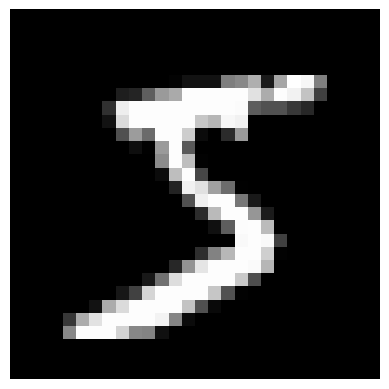


 The displayed number is :  5


In [ ]:
plt.imshow(x_train[0],cmap = 'grey')
plt.axis('off')
plt.show()
print('\n The displayed number is : ',y_train[0])

In [ ]:
# normalize the data
x_train = x_train/255
x_test = x_test/255

In [ ]:
# y_train sample data before encoding
print('1st train sample before encoding: ',y_train[0])

# converting the target to tone hot encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# y_train sample data after encoding
print('1st train sample agter encoding: ', y_train[0])

1st train sample before encoding:  5
1st train sample agter encoding:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
ann_model = Sequential([Flatten(),
                        Dense(128, activation = 'relu'),
                        Dropout(0.2),
                        Dense(64, activation = 'relu'),
                        Dropout(0.2),
                        Dense(10, activation = 'softmax')])

# compile the model
ann_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics =['accuracy'] )

In [ ]:
start_time = time.time()
ann_model.fit(x_train, y_train, epochs = 10, validation_split = 0.2)
end_time = time.time()

# calculate the time for computation
ann_training_time = end_time-start_time
print('\nann_training_time', round(ann_training_time,2),'seconds')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8137 - loss: 0.6072 - val_accuracy: 0.9583 - val_loss: 0.1428
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9463 - loss: 0.1772 - val_accuracy: 0.9678 - val_loss: 0.1063
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9597 - loss: 0.1354 - val_accuracy: 0.9712 - val_loss: 0.0978
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9667 - loss: 0.1076 - val_accuracy: 0.9720 - val_loss: 0.0914
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9696 - loss: 0.0953 - val_accuracy: 0.9752 - val_loss: 0.0873
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9754 - loss: 0.0801 - val_accuracy: 0.9737 - val_loss: 0.0899
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9750 - loss: 0.0786 - val_accuracy: 0.9783 - val_loss: 0.0813
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9784 - loss: 0.0684 - 

In [ ]:
# model_prediction
y_pred_ann  = ann_model.predict(x_test)#Returns a probability of all the numbers at their index position
y_pred_ann = np.argmax(y_pred_ann, axis=1)# picks the max of the np array and returns its index


# convert the y_train back to integer format
y_test_flat = np.argmax(y_test,axis =1)

# printing the first values from prediciton and actual
print('\nThe predicted value is : ',y_pred_ann[0])
print('The actual value is : ',y_test_flat[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

The predicted value is :  7
The actual value is :  7



Classificaiton Report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



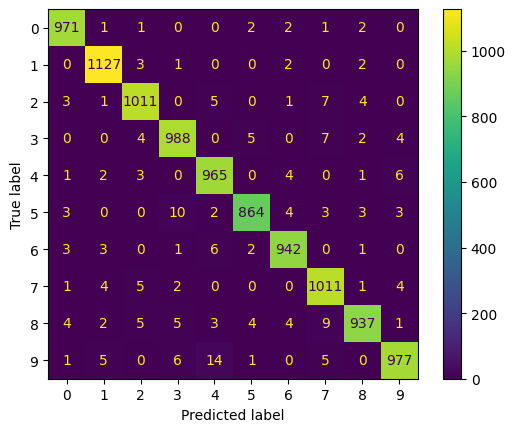

In [ ]:
# metric_validationg
cm_ann = ConfusionMatrixDisplay.from_predictions(y_test_flat,y_pred_ann)
print('\nClassificaiton Report:\n\n',classification_report(y_test_flat, y_pred_ann))

In [ ]:
# reload the data for CNN
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# reshape the data to 4 dimensions so that we can pass it to the cnn
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float')

# normalize the data
x_train /= 255.0
x_test /= 255.0

# converting the target to one hot encoder format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
cnn_model = Sequential([
    Conv2D(32, (3,3),activation = 'relu',input_shape = (28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    Conv2D(64,(5,5), activation = 'relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),

    Dense(128, activation = 'relu'),
    Dropout(0.3),
    Dense(10,activation = 'softmax')
])

# model compile
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
# training the architecture
start_time = time.time()
cnn_model.fit(x_train, y_train, epochs = 10, validation_split = 0.2)
end_time = time.time()

cnn_training_time = end_time-start_time
print('\ncnn_training_time: ', round(cnn_training_time,2),'seconds')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8580 - loss: 0.4545 - val_accuracy: 0.9849 - val_loss: 0.0547
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9761 - loss: 0.0789 - val_accuracy: 0.9880 - val_loss: 0.0416
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9806 - loss: 0.0602 - val_accuracy: 0.9870 - val_loss: 0.0454
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9872 - loss: 0.0434 - val_accuracy: 0.9893 - val_loss: 0.0343
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9893 - loss: 0.0353 - val_accuracy: 0.9907 - val_loss: 0.0328
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9900 - loss: 0.0325 - val_accuracy: 0.9919 - val_loss: 0.0311
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9894 - loss: 0.0317 - val_accuracy: 0.9913 - val_loss: 0.0326
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9904 - loss: 0.02

In [ ]:
# model predictions
y_pred_cnn = cnn_model.predict(x_test)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

# convert the y_train back to integer format
y_test_flat = np.argmax(y_test, axis=1)

# printing the first values from prediction and actual
print('\nThe predicted value is:', y_pred_cnn[0])
print('The actual value is:', y_test_flat[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

The predicted value is: 7
The actual value is: 7



Classification Report:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.97      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



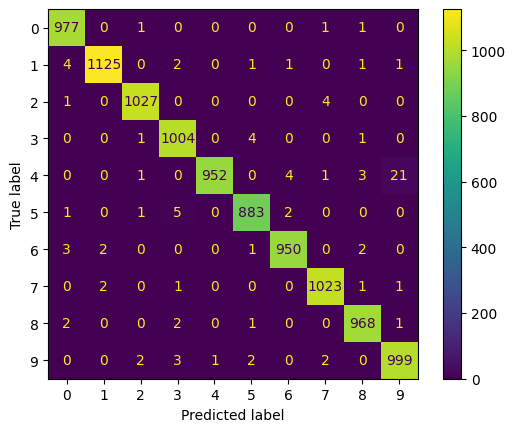

In [ ]:
# metric validation
cm_ann = ConfusionMatrixDisplay.from_predictions(y_test_flat, y_pred_cnn)
print('\nClassification Report:\n\n', classification_report(y_test_flat, y_pred_cnn))